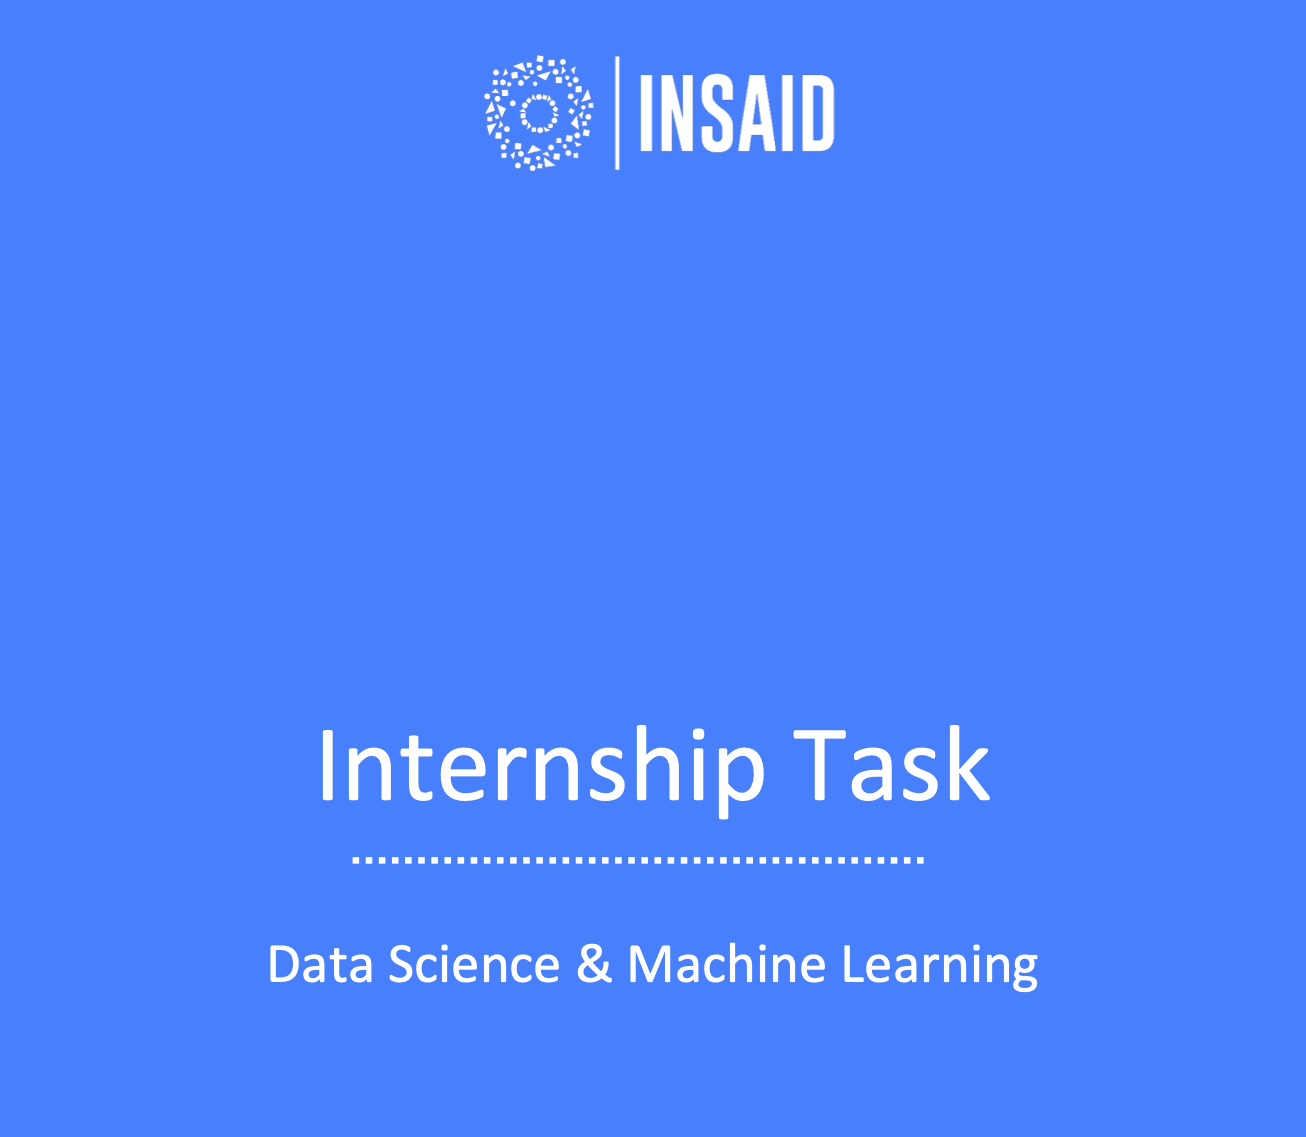

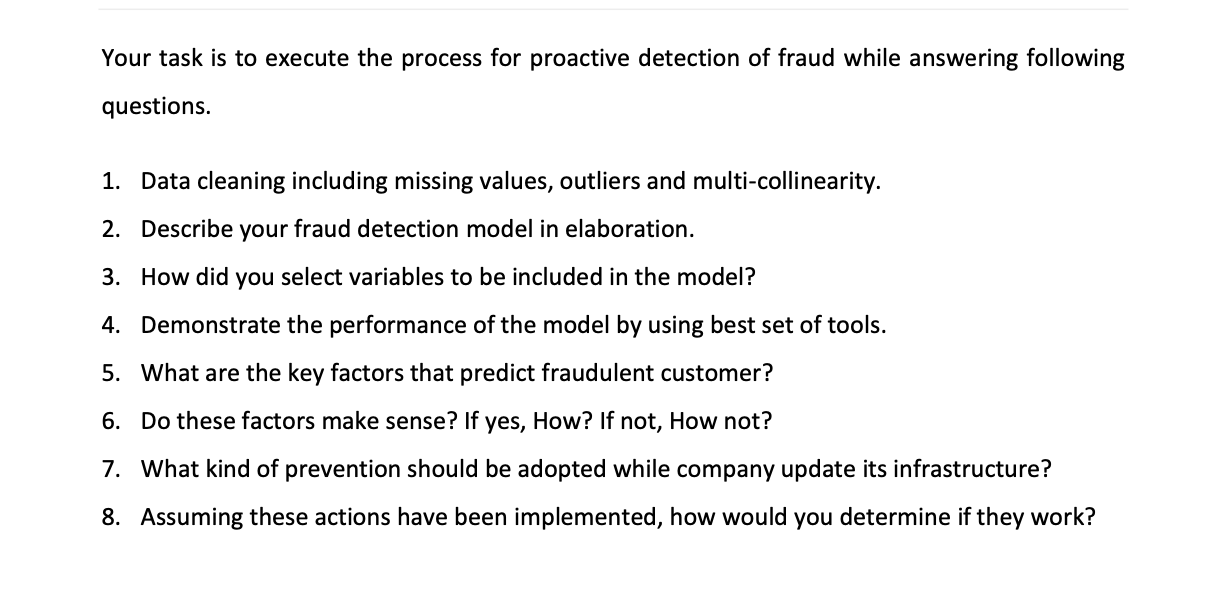

In [67]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Fraud.csv")
print(data.head(5))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


##Data Preprocessing

To understand the data:
1. How big is the data?
2. How does the data look like?
3. What is the data-type of columns?
4. Are there any missing values?
5. How does the data look like mathematically?
6. Are there duplicate values?
7. How is the correlation between the columns?

In [69]:
data.shape

(6362620, 11)

In [70]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4020952,299,CASH_IN,37070.31,C886860991,2195399.36,2232469.67,C1848905390,1732721.15,1695650.84,0,0
4595029,328,CASH_OUT,228698.11,C1076951099,35433.00,0.00,C1925612406,168756.97,397455.08,0,0
2951135,230,PAYMENT,8444.33,C1170149888,0.00,0.00,M213234490,0.00,0.00,0,0
1144508,131,PAYMENT,21172.53,C585901320,0.00,0.00,M1713416551,0.00,0.00,0,0
3366041,254,CASH_IN,463084.85,C1416316822,100082.00,563166.85,C637685796,827720.34,364635.49,0,0


This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [72]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [74]:
data.duplicated().sum()

0

In [75]:
numeric_columns = data.select_dtypes(include=['int', 'float'])
correlation_matrix = numeric_columns.corr() * 100
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,100.000000,2.237299,-1.005838,-1.029904,2.766536,2.588818,3.157757,0.327742
amount,2.237299,100.000000,-0.276247,-0.786093,29.413745,45.930427,7.668843,1.229460
oldbalanceOrg,-1.005838,-0.276247,100.000000,99.880276,6.624250,4.202862,1.015442,0.383453
newbalanceOrig,-1.029904,-0.786093,99.880276,100.000000,6.781152,4.183750,-0.814816,0.377606
oldbalanceDest,2.766536,29.413745,6.624250,6.781152,100.000000,97.656851,-0.588528,-0.051350
newbalanceDest,2.588818,45.930427,4.202862,4.183750,97.656851,100.000000,0.053535,-0.052872
isFraud,3.157757,7.668843,1.015442,-0.814816,-0.588528,0.053535,100.000000,4.410920
isFlaggedFraud,0.327742,1.229460,0.383453,0.377606,-0.051350,-0.052872,4.410920,100.000000


As we can observe at a first glance that "isFraud" column has more chance to be declare as a dependent or target variable because it contains only 1 or 0(Binary Classification Problem).

##Common guidelines for interpreting the strength of correlation coefficients are:

80 to 100 (or -80 to -00): **Very strong correlation**

60 to 80 (or -60 to -80): **Strong correlation**

40 to 60 (or -40 to -60): **Moderate correlation**

20 to 40 (or -20 to -40): **Weak correlation**

0 to 20 (or 0 to -20): **Very weak correlation**

<br>

*We have selected **threshold** 60 so we only get strong and very strong correlation.*

In [76]:
columns = data.select_dtypes(include=['int', 'float'])
for i in columns:
  print(i)


step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [95]:
columns.corr()["isFraud"]* 100

step                3.157757
amount              7.668843
oldbalanceOrg       1.015442
newbalanceOrig     -0.814816
oldbalanceDest     -0.588528
newbalanceDest      0.053535
isFraud           100.000000
isFlaggedFraud      4.410920
Name: isFraud, dtype: float64

In [97]:
# Function to categorize correlation strength
def categorize_correlation(corr_value):
    abs_corr = abs(corr_value) * 100  # Convert to percentage
    if abs_corr < 20:
        return "Very Weak Correlation"
    elif abs_corr < 40:
        return "Weak Correlation"
    elif abs_corr < 60:
        return "Moderate Correlation"
    elif abs_corr < 80:
        return "Strong Correlation"
    else:
        return "Very Strong Correlation"

# Calculate correlations with respect to 'step'
correlations = columns.corr()["isFraud"]

# Loop through correlations and print their categorized strength
for col, corr_value in correlations.items():
    if col == "isfraud":
        continue  # Skip self-correlation
    correlation_strength = categorize_correlation(corr_value)
    print(f"Correlation between 'isFraud' and '{col}' is {corr_value:.2f} ({correlation_strength})")


Correlation between 'isFraud' and 'step' is 0.03 (Very Weak Correlation)
Correlation between 'isFraud' and 'amount' is 0.08 (Very Weak Correlation)
Correlation between 'isFraud' and 'oldbalanceOrg' is 0.01 (Very Weak Correlation)
Correlation between 'isFraud' and 'newbalanceOrig' is -0.01 (Very Weak Correlation)
Correlation between 'isFraud' and 'oldbalanceDest' is -0.01 (Very Weak Correlation)
Correlation between 'isFraud' and 'newbalanceDest' is 0.00 (Very Weak Correlation)
Correlation between 'isFraud' and 'isFraud' is 1.00 (Very Strong Correlation)
Correlation between 'isFraud' and 'isFlaggedFraud' is 0.04 (Very Weak Correlation)


#Exploratory Data Analysis (EDA)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

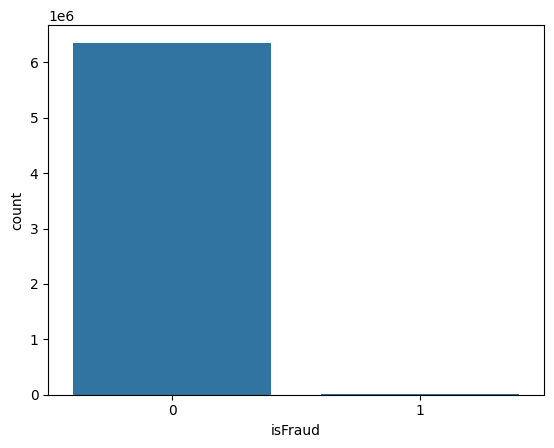

In [101]:
sns.countplot(x='isFraud', data=data)
plt.show()

<ipython-input-102-faa69f78d22c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'amount', data = data ,palette="husl")
<ipython-input-102-faa69f78d22c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data , palette= 'husl')
<ipython-input-102-faa69f78d22c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data ,palette="bright")


Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

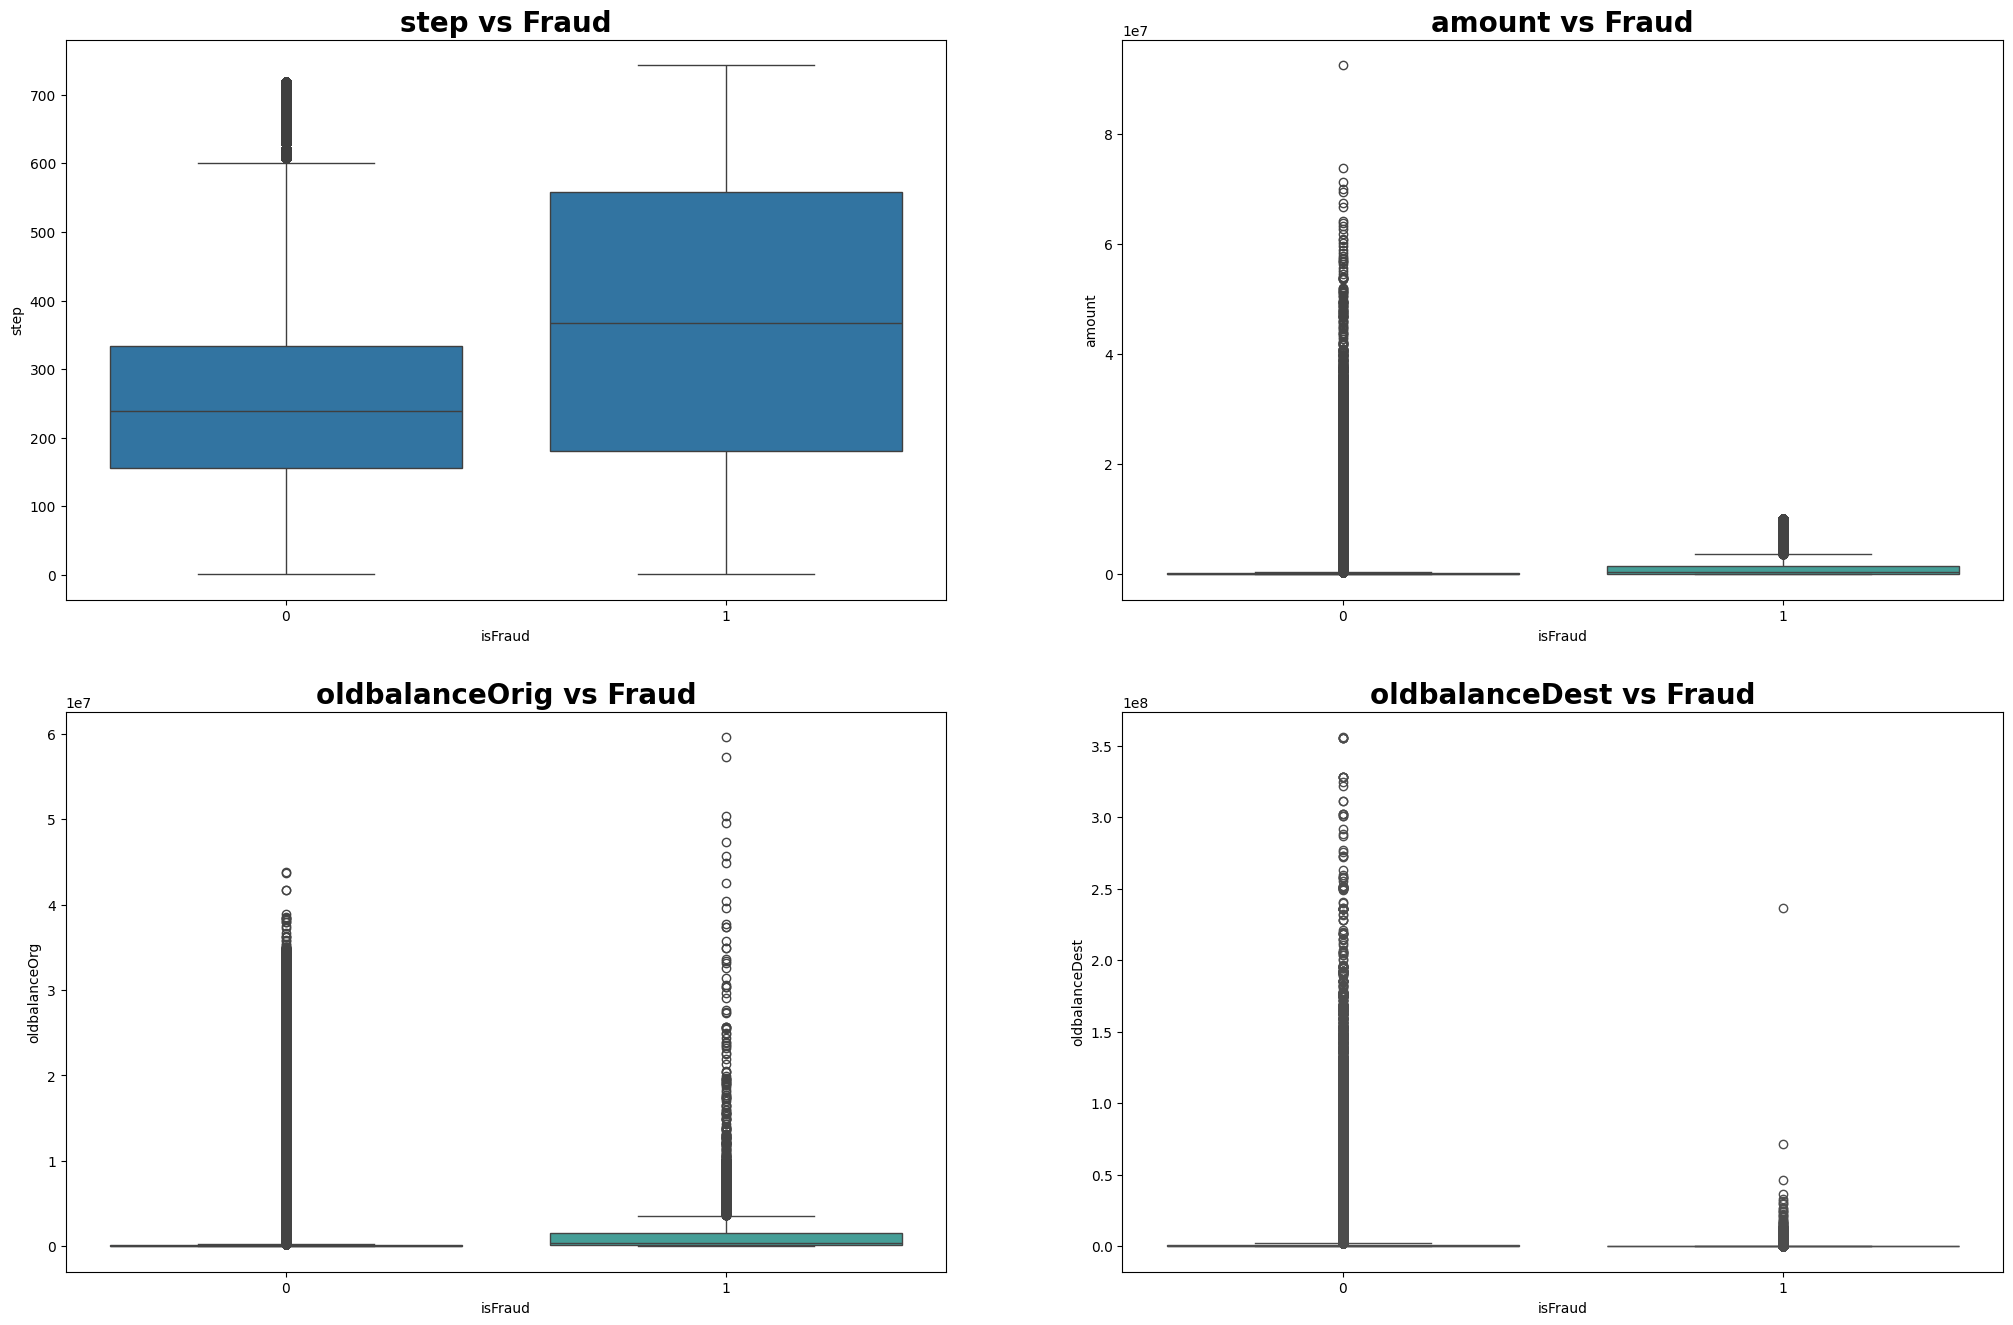

In [102]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data )
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data ,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data , palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data ,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

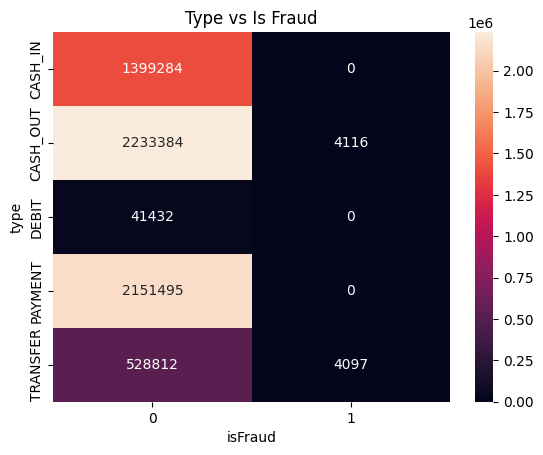

In [103]:
# 2-D Categorical Distributions
# Example for 'type' vs 'isFraud'
plt.figure()
ct = pd.crosstab(data['type'], data['isFraud'])
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Type vs Is Fraud')
plt.show()

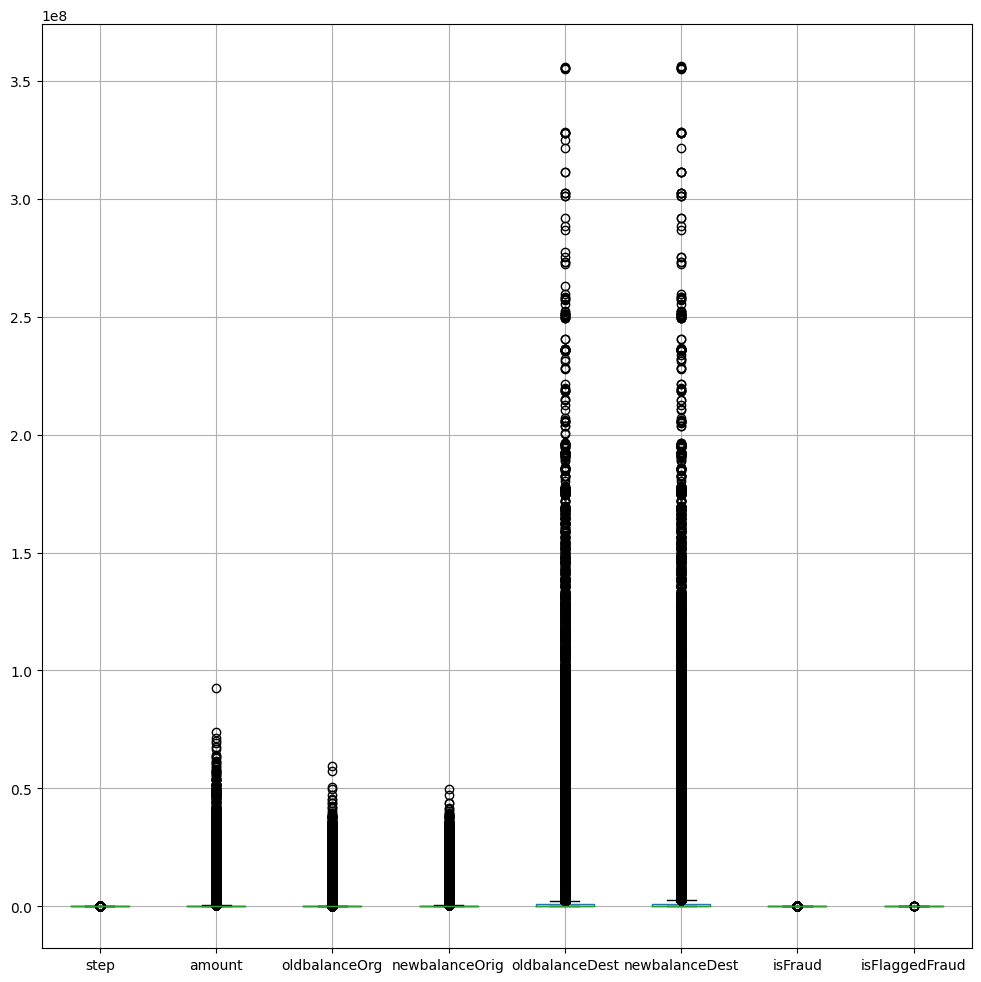

In [104]:
# Box plots for outliers and spread
data.boxplot(figsize=(12, 12))
plt.show()

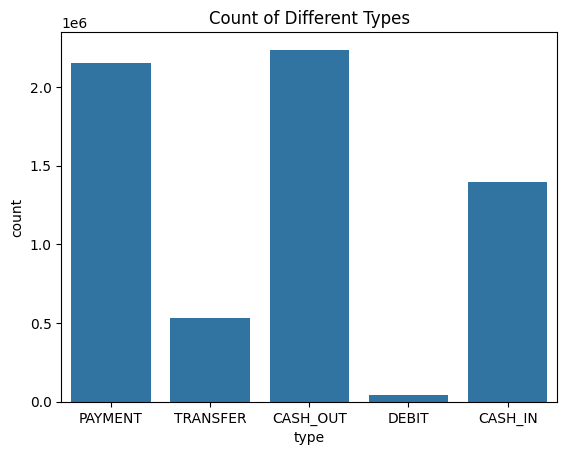

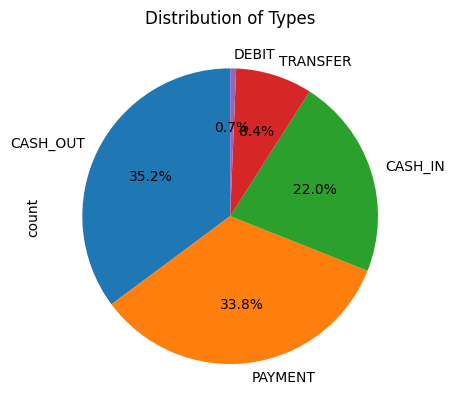

In [105]:
# Count plot for categorical distribution
sns.countplot(x='type', data=data)
plt.title('Count of Different Types')
plt.show()

# Pie chart for categorical distribution
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Types')
plt.show()

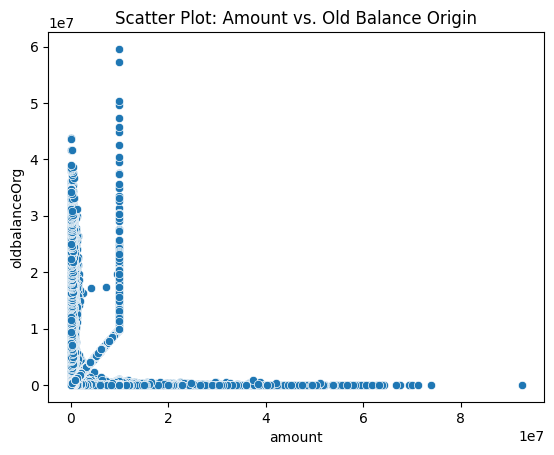

In [106]:
sns.scatterplot(x='amount', y='oldbalanceOrg', data=data)
plt.title('Scatter Plot: Amount vs. Old Balance Origin')
plt.show()

In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

In [108]:
# Encode categorical variables
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [110]:
a=data.drop(['nameOrig','nameDest'],axis=1)

In [112]:
b=a.corr()

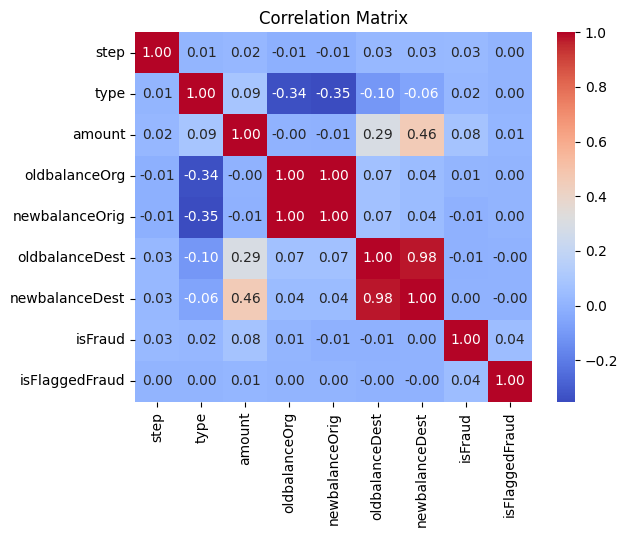

In [113]:
sns.heatmap(b, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [115]:
#  Sampling
# Using sampling technique due to computing power
sample_df = data.sample(frac=0.4, random_state=42)

#Splitting Data

In [119]:
#Split data into features and target
X = sample_df.drop(['isFraud', 'isFlaggedFraud','nameDest','nameOrig'], axis=1)
y = sample_df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2036038, 7)
(2036038,)
(509010, 7)
(509010,)


In [121]:
#Standardizing Data with `StandardScaler` for Optimal Model Performance
from sklearn.preprocessing import StandardScaler

In [122]:
sc = StandardScaler()
model=sc.fit(X)
X= model.transform(X)

#Model Training

In [123]:
#Enhancing Model Accuracy through Training and Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#Model Evaluation

In [125]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Function to evaluate a model and include AUC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted class labels
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Calculate and print AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc)

#Evaluate model:-

In [126]:
# For Logitic Regression

print("Logistic Regression Results:")
evaluate_model(log_reg, X_test, y_test)

Logistic Regression Results:
Confusion Matrix:
[[507827    493]
 [   409    281]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    508320
           1       0.36      0.41      0.38       690

    accuracy                           1.00    509010
   macro avg       0.68      0.70      0.69    509010
weighted avg       1.00      1.00      1.00    509010

Accuracy: 0.9982279326535825
AUC Score: 0.8555404731927395


#Answering the question:





Fraud Detection Process
Data Preprocessing

1. Data Understanding and Exploration:

Data Size: The initial dataset's dimensions are determined using the data.shape method, which reveals the number of rows and columns.
Data Overview: A quick look at the data using data.sample(5) and data.info() helps in understanding the data types of each column and their respective non-null counts, giving insights into the data’s structure.
Missing Values: The data.isnull().sum() function checks for any missing values in the dataset, ensuring completeness.
Statistical Summary: Descriptive statistics are obtained using data.describe(), which summarizes the central tendency, dispersion, and shape of the dataset’s distribution.
Duplicate Values: Checking for duplicate rows with data.duplicated().sum() ensures data uniqueness.
Correlation Analysis: A correlation matrix, data.select_dtypes(include=['int', 'float']).corr(), helps identify relationships between numerical features.
2. Data Cleaning and Transformation:

Categorical Encoding: Categorical variables like type are transformed into numerical values using LabelEncoder, making them suitable for model training.
Feature Selection: Non-informative columns such as nameOrig and nameDest are dropped to focus on relevant features.
Sampling: To manage computational resources, a representative sample of the data (frac=0.4) is taken using data.sample(frac=0.4, random_state=42).
Exploratory Data Analysis (EDA)

1. Visualizing Distributions:

Fraud Distribution: Using sns.countplot(x='isFraud', data=data), we visualize the distribution of fraudulent and non-fraudulent transactions.
Box Plots: These plots reveal the distribution and potential outliers of step, amount, oldbalanceOrg, and oldbalanceDest with respect to fraud, highlighting differences between fraudulent and non-fraudulent transactions.
Heatmap: A crosstab heatmap (pd.crosstab(data['type'], data['isFraud'])) visualizes the relationship between transaction types and fraud occurrence.
Overall Data Distribution: A data.boxplot() helps detect outliers, while count plots and pie charts (data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')) show the distribution of transaction types.
Scatter Plot: sns.scatterplot(x='amount', y='oldbalanceOrg', data=data) illustrates the relationship between transaction amount and the original balance.
Data Splitting and Scaling

1. Feature and Target Separation:

Preparation: The dataset is divided into features (X) and target (y) variables, dropping non-essential columns such as nameOrig and nameDest.
Train-Test Split: The data is split into training and testing sets using train_test_split(X, y, test_size=0.2, random_state=42).
2. Standardization:

Scaling: To standardize the feature values, StandardScaler is applied, ensuring all features contribute equally to the model's learning process.
Model Training

1. Logistic Regression:

Initialization and Training: A logistic regression model (LogisticRegression(max_iter=1000)) is initialized and trained using log_reg.fit(X_train, y_train), preparing it to make predictions based on learned patterns.
Model Evaluation

1. Performance Metrics:

Confusion Matrix: This matrix displays the number of true positives, true negatives, false positives, and false negatives, providing insight into the model's performance.
Classification Report: Metrics such as precision, recall, F1-score, and support for each class are presented, offering a detailed performance analysis.
Accuracy Score: The overall accuracy of the model is calculated using accuracy_score(y_test, y_pred).
AUC Score: The Area Under the Curve (AUC) score, calculated using roc_auc_score(y_test, y_pred_proba), measures the model’s ability to distinguish between classes, with higher scores indicating better performance.